# Explore the whole data and transform text data to structured data

In [1]:
import squarify #Tree plot algorithm
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np
import scipy.sparse

from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.feature_extraction.text import CountVectorizer
import nltk
import nltk.corpus as corpus


from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC

from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

import seaborn as sns
X_train, X_test,y_train,y_test = train_test_split(down.description, test_label, test_size = 0.2, random_state = 0)


# lenders

In [2]:
lenders = pd.read_csv('/Users/zhanhaochen/Desktop/STA160/kiva_ds_csv/lenders.csv', skiprows = 3, nrows = 100)

In [15]:
lenders.head()

,PERMANENT_NAME,DISPLAY_NAME,MAIN_PIC_ID,CITY,STATE,COUNTRY_CODE,MEMBER_SINCE,PERSONAL_URL,OCCUPATION,LOAN_BECAUSE,OTHER_INFO,LOAN_PURCHASE_NUM,INVITED_BY,NUM_INVITED
0,marla6741,Marla,NaN,NaN,NaN,NaN,1550681096,NaN,NaN,NaN,NaN,3,NaN,0
1,kelly3729,kelly,NaN,NaN,NaN,NaN,1550608558,NaN,NaN,NaN,NaN,1,NaN,0
2,xavier1787,Xavier,NaN,NaN,NaN,US,1550578184,NaN,NaN,NaN,NaN,1,NaN,0
3,colleen1371,Colleen,NaN,NaN,NaN,NaN,1550633596,NaN,NaN,NaN,NaN,1,NaN,3
4,zuulcat,Zuulcat Idea Brewery,3084046.0,NaN,NaN,SE,1550526586,NaN,NaN,NaN,NaN,20,NaN,0


In [140]:
lenders.columns

Index(['PERMANENT_NAME', 'DISPLAY_NAME', 'MAIN_PIC_ID', 'CITY', 'STATE',
       'COUNTRY_CODE', 'MEMBER_SINCE', 'PERSONAL_URL', 'OCCUPATION',
       'LOAN_BECAUSE', 'OTHER_INFO', 'LOAN_PURCHASE_NUM', 'INVITED_BY',
       'NUM_INVITED'],
      dtype='object')

In [24]:
def get_name(columns):
    return [i.lower() for i in columns]

# Loans

In [25]:
loans = pd.read_csv('/Users/zhanhaochen/Desktop/STA160/kiva_ds_csv/loans.csv', skiprows = 6)


In [6]:
loans.head()

,LOAN_ID,LOAN_NAME,ORIGINAL_LANGUAGE,DESCRIPTION,DESCRIPTION_TRANSLATED,FUNDED_AMOUNT,LOAN_AMOUNT,STATUS,IMAGE_ID,VIDEO_ID,...,LENDER_TERM,NUM_LENDERS_TOTAL,NUM_JOURNAL_ENTRIES,NUM_BULK_ENTRIES,TAGS,BORROWER_NAMES,BORROWER_GENDERS,BORROWER_PICTURED,REPAYMENT_INTERVAL,DISTRIBUTION_MODEL
0,109156,Afolabi,English,Afolabi O. is 35 years old and single. He sell...,NaN,550.0,550.0,funded,321370.0,NaN,...,10.0,20,1,1,NaN,Afolabi,male,true,monthly,field_partner
1,109347,Laura,Spanish,Z. es socia del Banco Comunal Virgen Maria.\nZ...,Z. is a member of Virgen Maria comunal bank. ...,550.0,550.0,funded,321669.0,NaN,...,6.0,18,1,1,NaN,Laura,female,true,monthly,field_partner
2,109490,Betania IV-B Group,English,Betania IV-B is a group of 10 farmers living i...,NaN,3150.0,3150.0,funded,319693.0,NaN,...,14.0,87,4,3,NaN,"Henderina, Margen, Dominggus, Efni, Elias, Fra...","female, male, male, male, male, female, male, ...","true, true, false, true, true, true, true, fal...",bullet,field_partner
3,109570,Ajka,English,Ajka comes from a suburb of the town of Banovi...,NaN,575.0,575.0,funded,322148.0,NaN,...,15.0,22,1,1,NaN,Ajka,female,true,monthly,field_partner
4,109819,Maria Salome,Spanish,La señora Salome pertenece al Banco Comunal “R...,Señora Salome is a member of the Banco Comunal...,500.0,500.0,funded,320794.0,NaN,...,7.0,18,1,1,NaN,Maria Salome,female,true,irregular,field_partner


In [142]:
loans.columns

Index(['loan id', 'loan name', 'original language', 'description',
       'description translated', 'funded amount', 'loan amount', 'status',
       'image id', 'video id', 'activity name', 'sector name', 'loan use',
       'country code', 'country name', 'town name', 'currency policy',
       'currency exchange coverage rate', 'currency', 'partner id',
       'posted time', 'planned expiration time', 'disburse time',
       'raised time', 'lender term', 'num lenders total',
       'num journal entries', 'num bulk entries', 'tags', 'borrower names',
       'borrower genders', 'borrower pictured', 'repayment interval',
       'distribution model'],
      dtype='object')

In [173]:
get_name(['PERMANENT_NAME', 'DISPLAY_NAME', 'MAIN_PIC_ID', 'CITY', 'STATE',
       'COUNTRY_CODE', 'MEMBER_SINCE', 'PERSONAL_URL', 'OCCUPATION',
       'LOAN_BECAUSE', 'OTHER_INFO', 'LOAN_PURCHASE_NUM', 'INVITED_BY',
       'NUM_INVITED'])

['permanent_name',
 'display_name',
 'main_pic_id',
 'city',
 'state',
 'country_code',
 'member_since',
 'personal_url',
 'occupation',
 'loan_because',
 'other_info',
 'loan_purchase_num',
 'invited_by',
 'num_invited']

In [26]:
loan_rename = get_name(['LOAN_ID', 'LOAN_NAME', 'ORIGINAL_LANGUAGE', 'DESCRIPTION',
       'DESCRIPTION_TRANSLATED', 'FUNDED_AMOUNT', 'LOAN_AMOUNT', 'STATUS',
       'IMAGE_ID', 'VIDEO_ID', 'ACTIVITY_NAME', 'SECTOR_NAME', 'LOAN_USE',
       'COUNTRY_CODE', 'COUNTRY_NAME', 'TOWN_NAME', 'CURRENCY_POLICY',
       'CURRENCY_EXCHANGE_COVERAGE_RATE', 'CURRENCY', 'PARTNER_ID',
       'POSTED_TIME', 'PLANNED_EXPIRATION_TIME', 'DISBURSE_TIME',
       'RAISED_TIME', 'LENDER_TERM', 'NUM_LENDERS_TOTAL',
       'NUM_JOURNAL_ENTRIES', 'NUM_BULK_ENTRIES', 'TAGS', 'BORROWER_NAMES',
       'BORROWER_GENDERS', 'BORROWER_PICTURED', 'REPAYMENT_INTERVAL',
       'DISTRIBUTION_MODEL'])

new_columns = {loans.columns[i]:loan_rename[i] for i in range(34)}
loans = loans.rename(columns = new_columns)
loans.head()

,loan_id,loan_name,original_language,description,description_translated,funded_amount,loan_amount,status,image_id,video_id,...,lender_term,num_lenders_total,num_journal_entries,num_bulk_entries,tags,borrower_names,borrower_genders,borrower_pictured,repayment_interval,distribution_model
0,109156,Afolabi,English,Afolabi O. is 35 years old and single. He sell...,NaN,550.0,550.0,funded,321370.0,NaN,...,10.0,20,1,1,NaN,Afolabi,male,true,monthly,field_partner
1,109347,Laura,Spanish,Z. es socia del Banco Comunal Virgen Maria.\nZ...,Z. is a member of Virgen Maria comunal bank. ...,550.0,550.0,funded,321669.0,NaN,...,6.0,18,1,1,NaN,Laura,female,true,monthly,field_partner
2,109490,Betania IV-B Group,English,Betania IV-B is a group of 10 farmers living i...,NaN,3150.0,3150.0,funded,319693.0,NaN,...,14.0,87,4,3,NaN,"Henderina, Margen, Dominggus, Efni, Elias, Fra...","female, male, male, male, male, female, male, ...","true, true, false, true, true, true, true, fal...",bullet,field_partner
3,109570,Ajka,English,Ajka comes from a suburb of the town of Banovi...,NaN,575.0,575.0,funded,322148.0,NaN,...,15.0,22,1,1,NaN,Ajka,female,true,monthly,field_partner
4,109819,Maria Salome,Spanish,La señora Salome pertenece al Banco Comunal “R...,Señora Salome is a member of the Banco Comunal...,500.0,500.0,funded,320794.0,NaN,...,7.0,18,1,1,NaN,Maria Salome,female,true,irregular,field_partner


In [6]:
loans['posted_time'] = pd.to_datetime(loans['posted_time'])
loans['planned_expiration_time'] = pd.to_datetime(loans['planned_expiration_time'])
loans['disburse_time'] = pd.to_datetime(loans['disburse_time'])
loans['raised_time'] = pd.to_datetime(loans['raised_time'])

In [124]:
loans.index

RangeIndex(start=0, stop=1682790, step=1)

In [9]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1682790 entries, 0 to 1682789
Data columns (total 34 columns):
loan_id                            1682790 non-null int64
loan_name                          1634235 non-null object
original_language                  1638581 non-null object
description                        1638546 non-null object
description_translated             1229155 non-null object
funded_amount                      1682790 non-null float64
loan_amount                        1682790 non-null float64
status                             1682790 non-null object
image_id                           1638581 non-null float64
video_id                           847 non-null float64
activity_name                      1682790 non-null object
sector_name                        1682790 non-null object
loan_use                           1638558 non-null object
country_code                       1682761 non-null object
country_name                       1682790 non-null object
tow

In [131]:
loans.status.value_counts()

funded         1592264
expired          76561
refunded          7529
fundRaising       6436
Name: status, dtype: int64

In [135]:
loans['repayment_interval'].value_counts()

monthly      1455928
bullet        153864
irregular      72998
Name: repayment_interval, dtype: int64

# Note:
### 1. Too much missing tags
### 2. Interesting variables: description (Haochen)
### 3. tags show some repeat borrowers




# Checking time series.

In [36]:
loans['raised_time'][0]

Timestamp('2009-05-18 22:06:49+0000', tz='UTC')

In [418]:

plt.hist(loans[loans['status']=='funded']['posted_time'],color = 'r',alpha = 0.1, label = 'funded')

plt.hist(loans[loans['status']=='expired']['posted_time'],color = 'b',alpha = 0.1, label = 'expired')

plt.hist(loans[loans['status']=='refunded']['posted_time'],color = 'w',alpha = 1, label = 'refunded')
plt.hist(loans[loans['status']=='fundRaising']['posted_time'],color = 'black',alpha = 1, label = 'fundraising' )
plt.legend()
plt.show()

ValueError: color kwarg must have one color per data set. 1592264 data sets and 1 colors were provided

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x1a393c9400> (for post_execute):


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x1a393d2d08> (for post_execute):


KeyboardInterrupt: 

In [415]:
down.description[150766]

'Norma, 42, is a single mother of two children she lives with in a village in the municipality of Macuelizo, Santa Bárbara.  She’s started her own grocery store business for the last two years in order to sell basic family staple items like basic grains, dairy products, vegetables, cured meats, disinfectants, pills, pasta, shortening, etc.  She’s always been a merchant selling merchandise and has also worked in agriculture to support her family.\\r\\n\\r\\nShe’s had several ODEF loans and is currently requesting her 11th loan for 20,000 Lempiras that she’ll use to buy basic staple items like basic grains, vegetables, dairy products, cured meats and others.  Her plan is that the business grows and that her children succeed in completing their schooling.\\r\\n'

In [152]:
loans[loans.status == 'fundRaising'].posted_time

102       2019-02-20 08:09:40+00:00
1988      2019-02-13 17:19:55+00:00
1989      2019-02-13 17:41:22+00:00
2128      2019-02-18 12:29:12+00:00
2404      2019-02-11 19:11:12+00:00
2406      2019-02-12 09:47:27+00:00
2408      2019-02-12 12:43:27+00:00
2789      2019-02-07 05:48:20+00:00
2791      2019-01-31 08:02:31+00:00
2812      2019-02-12 14:00:21+00:00
2813      2019-02-13 06:03:05+00:00
2814      2019-02-13 07:05:33+00:00
2815      2019-02-13 06:00:48+00:00
2861      2019-01-28 15:57:23+00:00
3360      2019-02-20 09:37:02+00:00
3386      2019-02-19 17:52:27+00:00
5611      2019-02-18 05:42:34+00:00
5612      2019-02-18 06:47:40+00:00
5617      2019-02-18 15:12:48+00:00
5619      2019-02-18 13:09:21+00:00
5834      2019-02-11 07:07:09+00:00
5835      2019-02-12 10:00:26+00:00
6163      2019-02-20 19:54:22+00:00
6164      2019-02-21 08:16:03+00:00
6324      2019-02-05 08:36:16+00:00
6325      2019-02-05 09:36:18+00:00
6386      2019-02-06 08:24:28+00:00
6390      2019-01-31 05:45:5

In [76]:
loans[loans['status']=='expired']['posted_time'].sort_values().head()

589766    2008-02-28 07:10:56+00:00
525289    2009-04-07 12:02:14+00:00
449023    2009-08-20 14:05:00+00:00
1396317   2009-08-20 14:41:31+00:00
754689    2009-08-20 15:48:52+00:00
Name: posted_time, dtype: datetime64[ns, UTC]

In [7]:
#Min date for expired funding.
loans = loans[loans['posted_time'] > '20080228']
loans = loans[loans['status'] != 'fundRaising']
loans = loans[loans['status'] != 'refunded']

In [ ]:
plt.scatter('posted_time', 'loan_amount',c = 'r',data = loans[loans['status']=='funded'])
plt.scatter('posted_time', 'loan_amount',c = 'b',data = loans[loans['status']=='expired'])

plt.show()
#The expired fundings are likely flowing below 20000 (Why did it happen?)

In [137]:
loans['status'].value_counts()

funded     1555163
expired      76561
Name: status, dtype: int64

In [158]:
1555163/(1555163+76561)

0.9530796874961697

# Need further exploration.

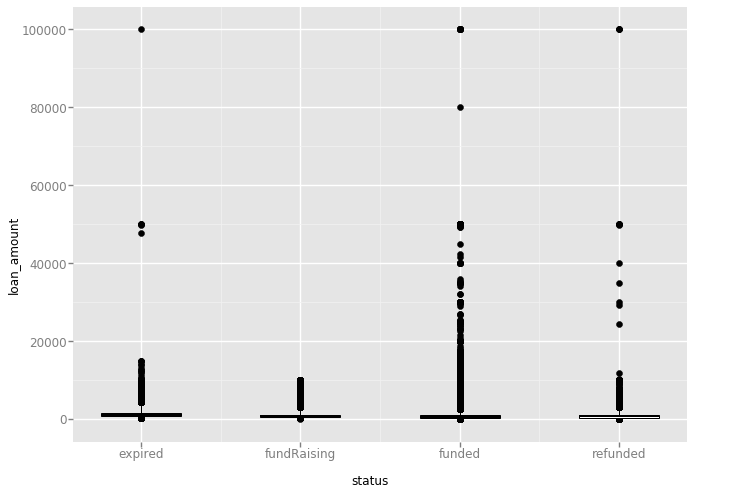

<ggplot: (7381988749)>

In [122]:
from ggplot import *
ggplot(loans, aes(x='status',y='loan_amount'))+geom_boxplot(outlier=0)

In [144]:

def splitit(loans):
    loans = loans[loans.loan_amount>20000]
    loans = loans[loans.status == 'expired']
    return loans

In [148]:
explor = splitit(loans)
explor.iloc[1]['description']

'Problem\\n<p>Historically in Mexico, poor families build their own houses with little or no assistance or technical advice – a process known as auto-production. Since these homes are built as one-offs, materials can be expensive. As a result, it can take a long time – at high cost – to build a house that lacks the minimal structural capacity to be safe, strong and durable, which is highly problematic for the commonly inclement weather in the Tabasco region (an area known for its intense rains and constant hurricanes).\\n</p>\\nSolution\\n<p>Alfonso and Santiago founded <a href="http://habvita.com/">Habvita</a> 8 years ago to focus on providing accessible, high quality, personalized, rural housing for Mexican families. Unlike other auto-production companies, Hábvita builds houses where their customers live or own land. The company has established a competitive edge by organizing families in order to build several houses simultaneously, thereby lowering materials costs and generating ec

In [149]:
explor.iloc[0]['loan_amount']

50000.0

In [68]:
funded_sample

DatetimeIndexResampler [freq=<MonthEnd>, axis=0, closed=right, label=right, convention=start, base=0]

In [ ]:
#Fundraising status were posted near the ending date of the data. This can be used as our predict

In [11]:
from ggplot import *

In [9]:
loans.loan_use.value_counts()

to buy a water filter to provide safe drinking water for their family.                                                                                                       9159
to buy a water filter to provide safe drinking water for her family.                                                                                                         6539
to build a sanitary toilet for her family                                                                                                                                    4654
to build a sanitary toilet for her family.                                                                                                                                   3712
to buy ingredients for her food production business                                                                                                                          3672
to buy feed and other supplies to raise her pigs.                                                             

In [10]:
loans.tags.value_counts()

user_favorite                                                                                                                                                       48943
#Woman Owned Biz                                                                                                                                                    25319
#Parent, #Woman Owned Biz                                                                                                                                           20877
#Parent                                                                                                                                                             15173
#Elderly                                                                                                                                                            12903
#Repeat Borrower                                                                                                                                      

In [11]:
loans.status.value_counts()

funded         1592264
expired          76561
refunded          7529
fundRaising       6436
Name: status, dtype: int64

In [145]:
loans.repayment_interval.value_counts()

monthly      1455928
bullet        153864
irregular      72998
Name: repayment_interval, dtype: int64

In [146]:
loans.distribution_model.value_counts()

field_partner    1664465
direct             18325
Name: distribution_model, dtype: int64

In [205]:
loans.activity_name.value_counts()[:100]

Farming                           167027
General Store                     147106
Retail                             79982
Food Production/Sales              75964
Personal Housing Expenses          70831
Clothing Sales                     68500
Agriculture                        64767
Pigs                               56001
Grocery Store                      49056
Fruits & Vegetables                43063
Higher education costs             34240
Fish Selling                       31667
Home Appliances                    30691
Food Market                        29534
Livestock                          28785
Tailoring                          25476
Food                               23819
Animal Sales                       23700
Food Stall                         23411
Poultry                            22879
Cattle                             22374
Services                           22300
Sewing                             21451
Dairy                              20448
Fishing         

In [139]:
loans.loan_use.value_counts()

to buy a water filter to provide safe drinking water for their family.                                                                                             9159
to buy a water filter to provide safe drinking water for her family.                                                                                               6539
to build a sanitary toilet for her family                                                                                                                          4654
to build a sanitary toilet for her family.                                                                                                                         3712
to buy ingredients for her food production business                                                                                                                3652
to buy feed and other supplies to raise her pigs.                                                                                                               

In [146]:
loans.loc[1,'description']
# Loan_use is included in description.

'Z. is a member of Virgen Maria comunal bank.  Z. is 48 years old and single.  She takes care of a nephew who she sends to school.\\r\\n\\r\\nZ. works with livestock, fattening them up on her ranch land.  She also travels to area markets where she buys grain, potatoes, cheese and small animals to sell in a different market, called Nery Garcia, and from door to door.\\r\\n\\r\\nZ. needs a loan of 1600 soles (Peruvian currency) to invest in the purchase of goats and cows.\\r\\n\\r\\nZ.’s dream is to educate her nephew and expand her stable where she raises livestock. \\r\\n<br /><p><strong>Translated from Spanish by Mary McKee, Kiva Volunteer</strong></p>'

In [15]:
loans.describe()
#CURRENCY_EXCHANGE_COVERAGE_RATE variance too small can be dropped,num_bulk_entries 
#https://www.youtube.com/watch?v=YaKMeAlHgqQ

,LOAN_ID,FUNDED_AMOUNT,LOAN_AMOUNT,IMAGE_ID,VIDEO_ID,CURRENCY_EXCHANGE_COVERAGE_RATE,PARTNER_ID,LENDER_TERM,NUM_LENDERS_TOTAL,NUM_JOURNAL_ENTRIES,NUM_BULK_ENTRIES
count,1.682790e+06,1.682790e+06,1.682790e+06,1.638581e+06,847.000000,1.345464e+06,1.664465e+06,1.682766e+06,1.682790e+06,1.682790e+06,1.682790e+06
mean,8.570015e+05,7.837114e+02,8.246249e+02,1.763180e+06,2565.658796,1.133567e-01,1.578132e+02,1.310918e+01,2.162486e+01,1.526650e+00,1.137722e+00
std,4.929807e+05,1.067856e+03,1.120753e+03,8.559269e+05,953.990228,3.401862e-02,9.559313e+01,7.389155e+00,2.833316e+01,1.017097e+00,4.883049e-01
min,8.400000e+01,0.000000e+00,2.500000e+01,2.410000e+02,7.000000,1.000000e-01,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
25%,4.312492e+05,2.750000e+02,3.000000e+02,1.102599e+06,2252.500000,1.000000e-01,1.020000e+02,8.000000e+00,8.000000e+00,1.000000e+00,1.000000e+00
50%,8.577985e+05,5.000000e+02,5.000000e+02,1.850590e+06,2780.000000,1.000000e-01,1.450000e+02,1.300000e+01,1.400000e+01,1.000000e+00,1.000000e+00
75%,1.282309e+06,9.250000e+02,1.000000e+03,2.505611e+06,3244.500000,1.000000e-01,1.810000e+02,1.400000e+01,2.600000e+01,2.000000e+00,1.000000e+00
max,1.713595e+06,1.000000e+05,1.000000e+05,3.092166e+06,3953.000000,2.000000e-01,5.920000e+02,1.950000e+02,3.234000e+03,1.060000e+02,5.300000e+01


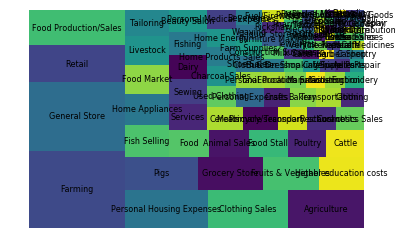

<Figure size 1440x720 with 0 Axes>

<module 'squarify' from '/anaconda3/lib/python3.7/site-packages/squarify/__init__.py'>

In [231]:
squarify.plot(sizes = loans.activity_name.value_counts()[:100].values, label = loans.activity_name.value_counts()[:100].index)
plt.axis('off')
plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size': 8})
plt.show()
squarify

In [17]:
#Try to merge MPI with kiva's loan data but decided not to because many cities are not same between two datasets.
mpi = pd.read_excel('/Users/zhanhaochen/Desktop/STA160/Table-5-Subnational-MPI-2018-Dec.xlsx', skiprows=8)
mpi.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24
0,4,AFG,Afghanistan,South Asia,DHS,2015-2016,Kabul,0.273302,NaN,0.078566,...,34656.032,33736.494,34656.032,NaN,0.120897,4189.815918,757.436401,NaN,9.0,Nutrition
1,4,AFG,Afghanistan,South Asia,DHS,2015-2016,Kapisa,0.273302,NaN,0.203139,...,34656.032,33736.494,34656.032,NaN,0.007300,252.971848,111.466156,NaN,9.0,Nutrition
2,4,AFG,Afghanistan,South Asia,DHS,2015-2016,Parwan,0.273302,NaN,0.271974,...,34656.032,33736.494,34656.032,NaN,0.023361,809.616638,493.189697,NaN,9.0,Nutrition
3,4,AFG,Afghanistan,South Asia,DHS,2015-2016,Wardak,0.273302,NaN,0.307642,...,34656.032,33736.494,34656.032,NaN,0.013176,456.644928,315.477509,NaN,9.0,Nutrition
4,4,AFG,Afghanistan,South Asia,DHS,2015-2016,Logar,0.273302,NaN,0.216212,...,34656.032,33736.494,34656.032,NaN,0.017414,603.487488,287.974884,NaN,9.0,Nutrition


In [42]:
len(mpi.region.drop_duplicates())
#929 regions mpi points.

929

# Starting NLP

## Down sampling the description by status 
##  Increase the discriminative power between the two classes.

https://www.kaggle.com/residentmario/undersampling-and-oversampling-imbalanced-data under-sampling
Hence if under-sampling helps significantly with our rare-point bias problem, it is well worth doing!
Building and checking the sample learning curve is easy and well worth doing.

In [18]:
loans.columns

Index(['loan_id', 'loan_name', 'original_language', 'description',
       'description_translated', 'funded_amount', 'loan_amount', 'status',
       'image_id', 'video_id', 'activity_name', 'sector_name', 'loan_use',
       'country_code', 'country_name', 'town_name', 'currency_policy',
       'currency_exchange_coverage_rate', 'currency', 'partner_id',
       'posted_time', 'planned_expiration_time', 'disburse_time',
       'raised_time', 'lender_term', 'num_lenders_total',
       'num_journal_entries', 'num_bulk_entries', 'tags', 'borrower_names',
       'borrower_genders', 'borrower_pictured', 'repayment_interval',
       'distribution_model'],
      dtype='object')

In [10]:
loans['index'] = loans.index

In [35]:
X = loans[['index','loan_amount','original_language', 'description','description_translated','activity_name','sector_name','country_name','town_name']].values
y = loans['status'].values

from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=0)

X_res, y_res = rus.fit_resample(X, y)


In [39]:
y_res

array(['expired', 'expired', 'expired', ..., 'funded', 'funded', 'funded'],
      dtype=object)

In [58]:
downsampled_loan = pd.DataFrame(X_res,columns=['index','loan_amount','original_language', 'description','description_translated','activity_name','sector_name','country_name','town_name'])


In [59]:
downsampled_loan=pd.concat([downsampled_loan, pd.Series(y_res,name = 'status')], axis = 1)

In [62]:
all_doc = downsampled_loan['description'].copy()
for i in downsampled_loan.index:
    if downsampled_loan['original_language'][i] != 'English':
        all_doc[i] = downsampled_loan['description_translated'][i]
      
downsampled_loan['description'] = all_doc

In [ ]:
downsampled_loan = downsampled_loan[downsampled_loan['description'].notna()]
downsampled_loan = downsampled_loan.reset_index(drop = True)  

In [68]:
all_doc = downsampled_loan['description']

In [69]:
downsampled_loan.head()

,index,loan_amount,original_language,description,description_translated,activity_name,sector_name,country_name,town_name,status
0,27,4475,Russian,Vitaliy lives in the city of Melitopol. He is ...,Vitaliy lives in the city of Melitopol. He is ...,Personal Housing Expenses,Housing,Ukraine,Melitopol,expired
1,44,1200,English,"Youn, 34, lives with family members in a rural...","Youn, 34, lives with family members in a rural...",Farming,Agriculture,Cambodia,"Ratanakiri province, Borkeo district",expired
2,77,1150,English,"Living in a rural area of Battambang province,...","Living in a rural area of Battambang province,...",Farming,Agriculture,Cambodia,"Battambang province, Ratanak Mondul district",expired
3,113,1200,English,"Lilia, 57, lives in Danao, Plaridel, Misamis O...",NaN,Fish Selling,Food,Philippines,Plaridel-Danao,expired
4,121,300,English,Melane is 32 years old and married with three ...,Melane is 32 years old and married with three ...,General Store,Retail,Philippines,"Banga, Aklan",expired


In [71]:
#downsampled_loan.to_csv('downsampled.csv')

In [66]:
downsampled_loan.index

RangeIndex(start=0, stop=150767, step=1)

In [189]:
#downsampled_loan.to_pickle('downsampled_loan')

In [2]:

downsampled_loan = pd.read_csv('/Users/zhanhaochen/Desktop/STA160/downsampled.csv')


In [3]:
all_doc = downsampled_loan['description']

In [4]:
len(all_doc)

150767

* In the context of the bias-variance tradeoff, what we hope to achieve by resampling data is to reduce bias, or underfit (recall the clearly one-class-is-the-only-class model from the illustrative example, which is a) more than we increase variance, or overfit (which goes up when decrease the number of input observations or copy-paste points). A way of quantifying this hope is to look at a learning curve.

# Encoding the status label

In [5]:
y = downsampled_loan.status

In [6]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(y)
print(le.classes_)
test_label= le.transform(y) 
test_label

['expired' 'funded']


array([0, 0, 0, ..., 1, 1, 1])

### 0 : expired
### 1 : funded

# word2vec
# tokenizing descriptions

In [16]:
from gensim.models import Word2Vec ### gensim is text modeling library in python - https://pypi.org/project/gensim/
from matplotlib import pyplot
import nltk
import nltk.corpus as corpus
from sklearn.linear_model import LogisticRegression


stopword = corpus.stopwords.words('english')

In [499]:
#Tokenize all descriptions.
stopword = corpus.stopword
token_doc = [i.lower() for i in all_doc]

token_doc = [nltk.word_tokenize(i) for i in token_doc]

for j in range(len(token_doc)):
    token_doc[j] = [i for i in token_doc[j] if i not in stopword and i.isalnum()]


# Using Google news pretrained model word2vec after tokenize it.

In [1]:
from keras.preprocessing.text import Tokenizer, one_hot
from gensim.models import KeyedVectors

# Load Google's pre-trained Word2Vec model.
model = KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin', binary=True)  

Using TensorFlow backend.


In [4]:
down = pd.read_csv('/Users/zhanhaochen/Desktop/STA160/down.csv')

In [ ]:
all_doc = down.description

In [ ]:
w2vdict ={}
for i in token_doc:
    for j in i:
        try:
            w2vdict[j] = model[j]
        except:
            continue

# Check word frequency for all descriptions.

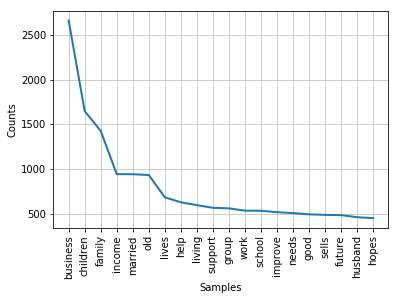

In [54]:

test_desc = []
for i in range(2000):
    test_desc += test_doc[i]

fd = nltk.FreqDist(test_desc)
fd.plot(20)

Refer to https://medium.freecodecamp.org/how-to-get-started-with-word2vec-and-then-how-to-make-it-work-d0a2fca9dad3

In [498]:
all_doc[0]

'Vitaliy lives in the city of Melitopol. He is not married and works as a master of laying paving tiles. <br /><br />Vitaliy purchased a plot of land to develop. This year he would like to lay the fundament and build the walls of his future house. Vitaliy requests a loan of 120,000 hryvnia in order to start the construction. <br /><br />Thanks to the loan, Vitaliy will be able to hire a construction team, which can start working shortly. Vitaliy thanks the Kiva lenders in advance for the help with realizing his dreams - owning a house.'

In [143]:
#Size is hyper parameter controls the dense vector of the word.
model = Word2Vec(
        token_doc,
        size=100,
        min_count=2,
        workers=12)
model.train(token_doc, total_examples=len(token_doc), epochs=10)

(83688189, 100218170)

In [186]:
len(model.wv.vectors) #syn0 deprecated to self.vectors.

50775

In [146]:
#model.save('w2vmodel')

In [487]:
test_doc[0]

['afolabi',
 '35',
 'old',
 'single',
 'sells',
 'medicines',
 'requesting',
 'medicines',
 'sell',
 'says',
 'thanks']

In [187]:
w2vdict = dict(zip(model.wv.index2word, model.wv.vectors))

In [504]:
len(list(w2v.keys()))

61164

# Calculate w2v mean. (cost 2 days)

In [507]:
def cal_mean_des(doc):
    w2v_sum = 0
    n = 0
    for i in doc:
        if i in list(w2v.keys()):
            n+=1
            w2v_sum += w2v[i]
    try:
        return w2v_sum / n
    except:
        return np.zeros(100)

In [508]:
#CAREFUL
mean_desc = np.array([cal_mean_des(doc) for doc in token_doc])



In [510]:
mean_desc[0]

array([ 0.47775158,  0.46960831, -0.21684469, -1.50460279, -0.34574339,
        1.05715227,  0.82045835, -0.2330206 ,  0.45850551, -0.08349667,
       -0.28656769, -0.60666263, -0.62816101,  0.43873397, -0.16674872,
        0.54667395, -0.25427884,  0.34978461, -0.52874225,  0.07375503,
        0.72984201,  0.29182887, -0.60493082, -0.11197276, -0.32122135,
       -0.66442323, -0.02567876,  1.06214881, -0.07326623,  0.34651929,
        0.37946609,  0.395684  , -0.48259044,  0.35971162, -0.01231158,
        0.35333011, -0.22095037, -0.57442153,  0.14937903,  0.79929096,
       -0.44099143, -0.58812892,  0.19999731, -0.55933338, -0.07296836,
        0.24967079, -0.24162793, -0.1358166 ,  0.21587132,  0.21400438,
       -0.1153358 ,  0.20375748,  0.16170235,  0.10965175, -0.73788774,
       -0.16524173,  0.50778079,  0.03894417, -0.31940082,  0.35880902,
       -0.78205615,  1.17725945, -0.15469769, -1.22523701, -0.60807931,
       -0.03321267,  0.4972446 ,  0.18922123,  0.73797715, -1.34

In [512]:
np.savetxt("w2vmean.csv", mean_desc, delimiter=",")

# Try Word2vec

In [416]:
w1 = 'pig'
model.wv.most_similar(positive = w1)

[('fattening', 0.8131334185600281),
 ('vitamins', 0.7627301216125488),
 ('piglets', 0.7439150810241699),
 ('feeds', 0.7383972406387329),
 ('breeder', 0.70420241355896),
 ('pigs', 0.6927895545959473),
 ('sows', 0.6648266315460205),
 ('forage', 0.6536864042282104),
 ('chickens', 0.6430827379226685),
 ('hog', 0.6384037733078003)]

## Test a sample from descriptions

In [329]:
test_x = np.concatenate((all_doc[:1000], all_doc[-1000:]), axis=0)
test_y = list(test_label[:1000]) + list(test_label[-1000:])
test_x = list(test_x)
test_y = np.array(test_y)

In [330]:
vec = CountVectorizer(stop_words = stop_words)

freq = vec.fit_transform(test_x)

# reference: https://medium.com/@haya.toumy/natural-language-processing-apis-and-classification-in-python-a-project-walkthrough-edbd5b501a01

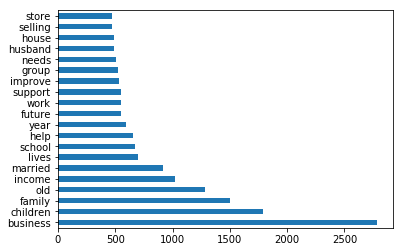

In [205]:
all_feature_df = pd.DataFrame(freq.todense(), columns=vec.get_feature_names()) #attaching column names i.e. words

all_feature_df.sum().sort_values(ascending=False).head(20).plot(kind='barh')

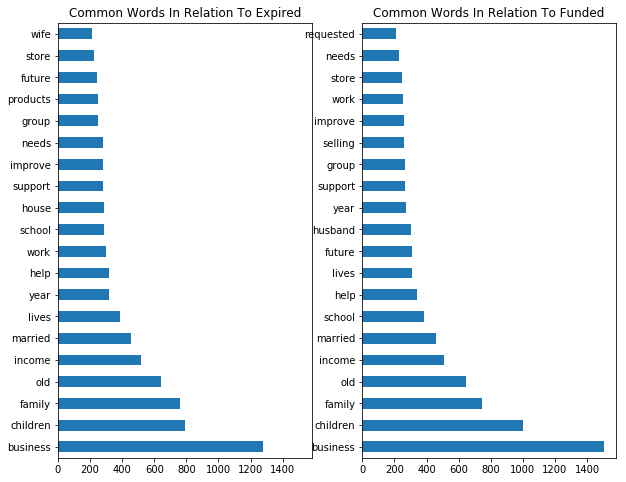

In [206]:


df_expired = all_feature_df.loc[test_y == 0].copy()
df_funded = all_feature_df.loc[test_y == 1].copy()
common_words_indicies_0 = df_expired.sum().sort_values(ascending=False).head(20).index
common_words_indicies_1 = df_funded.sum().sort_values(ascending=False).head(20).index
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (10,8), sharex=True) #last argument to set same scale for x
df_expired.sum().loc[common_words_indicies_0].plot(kind = 'barh',ax = ax[0], title = 'common words in relation to expired'.title());
df_funded.sum().loc[common_words_indicies_1].plot(kind = 'barh', ax= ax[1], title = 'common words in relation to funded'.title());


In [88]:
import pandas as pd
import numpy as np
import scipy.sparse

from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.feature_extraction.text import CountVectorizer
from matplotlib import pyplot
import nltk
import nltk.corpus as corpus


from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC

from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn import metrics

import seaborn as sns
X_train, X_test,y_train,y_test = train_test_split(down.description, test_label, test_size = 0.2, random_state = 0)


In [ ]:
train, test = train_test_split(df, test_size = 0.2,random_state = 0)

In [549]:
tf_log_pipe = Pipeline([('tfdf', TfidfVectorizer()),('logreg', LogisticRegression())])
tf_log_params = {
    'tfdf__stop_words' : [stopword, None],
    'logreg__penalty' : ['l1', 'l2'],
    'logreg__C' : [.1, 5, 50]
}
tf_log_gs = GridSearchCV(tf_log_pipe, tf_log_params, cv = 5, verbose=0)
tf_log_gs.fit(X_train, y_train)
print('best score of TFDIF with Logistic Regression is:', tf_log_gs.best_score_.round(4))

best score of TFDIF with Logistic Regression is: 0.7741


In [550]:
print(tf_log_gs.best_estimator_.get_params()['steps'])

[('tfdf', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words=None, strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)), ('logreg', LogisticRegression(C=5, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False))]


In [671]:
tfidf = TfidfVectorizer(stop_words='english', strip_accents='unicode', analyzer='word')

X_train_tf = tfidf.fit_transform(X_train)
X_test_tf = tfidf.transform(X_test)
print(X_train_tf.shape)

logreg = LogisticRegression(C = 5, penalty = 'l2',random_state=0) #l2 is Ridge 

logreg.fit(X_train_tf, y_train)
preds = logreg.predict(X_test_tf)

(120613, 95681)


In [672]:
cm = confusion_matrix(y_test, preds)
a = cm[0]/np.sum(cm,axis =1)[0]
b = cm[1]/np.sum(cm,axis =1)[1]
cm = np.array([a,b]).round(2)


In [673]:
print((cm[0][0] + cm[1][1]) /2)

0.765


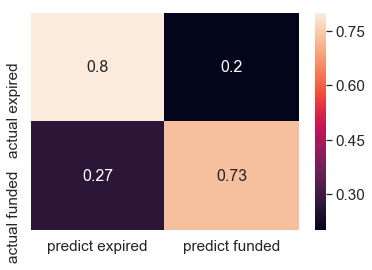

In [598]:

df_cm = pd.DataFrame(cm, ['actual expired', 'actual funded'], ['predict expired', 'predict funded'])
sns.heatmap(df_cm, annot=True, annot_kws={'size':16}, fmt='g')

plt.show()

In [599]:
word_name = pd.Series(tfidf.get_feature_names())

coef_df = pd.Series(logreg.coef_[0])
print(word_name[coef_df.sort_values(ascending = True).head(15).index]) #Contribute most negative to expired
print(word_name[coef_df.sort_values(ascending = True).tail(15).index]) #Contribute most positive to funded


79018             sep
40412          kilolo
29091     gegharkunik
311               120
197               100
41170         kopsyah
89250             ugx
86050           texas
71075        pressing
37754          jordan
79046          septic
50029      mondulkiri
74322     represented
16325         colgate
17144    conservative
dtype: object
48806           mfp
27001        filter
57756      nigerian
38383         kadet
33033            ho
23053           ela
51143      murabaha
10641           bjs
6809         asasah
22104           dtm
92689         widow
90458       vahatra
91756     volunteer
43328       liberia
87667    translated
dtype: object


# Add description length feature to it.
https://www.kaggle.com/adamschroeder/countvectorizer-tfidfvectorizer-predict-comments

In [53]:
#add description length as a variable.
import re
down['description_length'] = down['description'].apply(lambda x: len(re.findall(r"[\w]", str(x))))


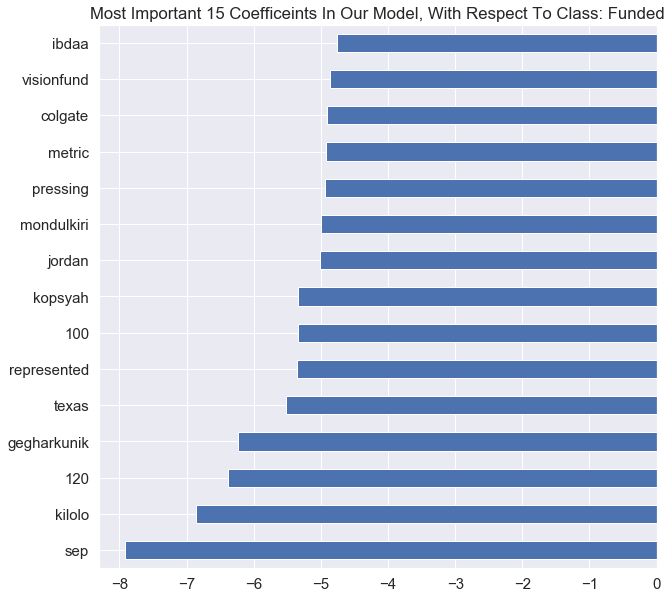

In [443]:
coef_df.sort_values(by = 'abs', ascending = False).head(15)[0].plot(kind = 'barh', figsize = (10,10), title = "most \
important 15 coefficeints in our model, with respect to class: funded".title(), fontsize = 15);

## In some cases you do want to minimize False Negatives though even at the cost of increasing False Positives; like when you’re dealing with cancer screening, or fraudulent transactions; because you don’t want to send home a sick patient, or let a fraudulent transaction slip.
## In this case, we need to make predictions on expired data more stable since the most of them are funded status in the original data. We then could raise the threshold for our classifier.


In [574]:
probs_nut = tf_log_gs.predict_proba(X_test)[:,1]
probs_nut

array([0.55130304, 0.92928885, 0.0533946 , ..., 0.43809998, 0.94853972,
       0.1276415 ])

In [446]:
# getting prediction probabilities from our winning model, only for the positive class 
probs_nut = tf_log_gs.predict_proba(X_test)[:,1]
# setting the threshold, and getting the new predictions/classifications: 
def classify(thresh, probs_list):
    """
    thresh: threshold of classification 
    probs_list: a list of predict_proba of only the class of interest. Must be worked outside the function 
    """
    preds_thresh = [1 if probs_list[i] >= thresh else 0 for i in range(len(probs_list))]
    return preds_thresh
# getting the confusion matrix with the new threshold predictions, printed nicely:  
pd.DataFrame(confusion_matrix(y_test, classify(0.9, probs_nut)), ['actual expired', 'actual funded'], ['predict expired', 'predict funded'] )

,predict expired,predict funded
actual expired,15036,204
actual funded,9635,5279


In [420]:
#Once we increased the threshold for the probability of funded, we minimized false negative.
18747/(18747+251)

0.9867880829561007

## Draw ROC Curve

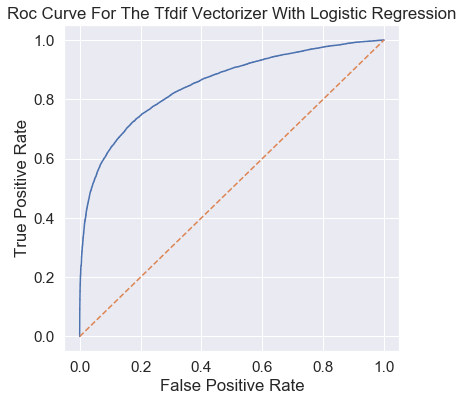

In [575]:
from sklearn.metrics import roc_curve
y_numerical = y_test
fpr, tpr, _ = roc_curve(y_numerical, probs_nut)
plt.figure(figsize = (6,6))
plt.plot(fpr, tpr);
plt.plot([0,max(y_numerical)],[0, max(y_numerical)], '--'); # it takes only encoded numerical y
plt.title('ROC curve for the TFDIF vectorizer with logistic regression'.title());
plt.xlabel('false positive rate'.title());
plt.ylabel('true positive rate'.title());

## Logistic Classifier with Term-Document


In [576]:
warnings.filterwarnings("ignore")
td_log_pipe = Pipeline([('td', CountVectorizer()),('logreg', LogisticRegression())])
td_log_params = {
    'td__stop_words' : [stopword, None],
    'logreg__penalty' : ['l1', 'l2'],
    'logreg__C' : [.1, 5, 50]
}
td_log_gs = GridSearchCV(td_log_pipe, td_log_params, cv = 5, verbose=0)
td_log_gs.fit(X_train, y_train)
print('best score of Term-Document with Logistic Regression is:', td_log_gs.best_score_.round(4))

best score of Term-Document with Logistic Regression is: 0.7748


In [407]:
print(td_log_gs.best_estimator_.get_params()['steps'])

[('td', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)), ('logreg', LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False))]


# term-document train and test

In [394]:

vec = CountVectorizer(stop_words='english', strip_accents='unicode', analyzer='word')

X_train_df = vec.fit_transform(X_train)
X_test_df = vec.transform(X_test)
print(X_train_df.shape)

logreg = LogisticRegression(C = 0.1, penalty = 'l2', random_state=0) #l2 is Ridge 

logreg.fit(X_train_df, y_train)
preds = logreg.predict(X_test_df)
print("Accuracy:",metrics.accuracy_score(y_test, preds))

(120613, 95681)


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy: 0.7725343238044704


In [85]:
# scipy.sparse.save_npz('X_test_df.npz', X_test_df)
# np.save('y_train', y_train)
# np.save('y_test',y_test)

In [82]:

X_train_df = scipy.sparse.load_npz('/Users/zhanhaochen/Desktop/STA160/X_train_df.npz')
X_test_df = scipy.sparse.load_npz('/Users/zhanhaochen/Desktop/STA160/X_test_df.npz')

<120613x95681 sparse matrix of type '<class 'numpy.int64'>'
	with 6486718 stored elements in Compressed Sparse Row format>

In [18]:

scipy.sparse.save_npz('X_train_df.npz', X_train_df)


In [676]:
cm = confusion_matrix(y_test, preds)
a = cm[0]/np.sum(cm,axis =1)[0]
b = cm[1]/np.sum(cm,axis =1)[1]
cm = np.array([a,b]).round(2)

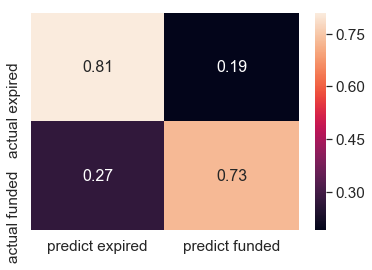

In [610]:
import seaborn as sns
df_cm = pd.DataFrame(cm, ['actual expired', 'actual funded'], ['predict expired', 'predict funded'])
sns.heatmap(df_cm, annot=True, annot_kws={'size':16}, fmt='g')

plt.show()

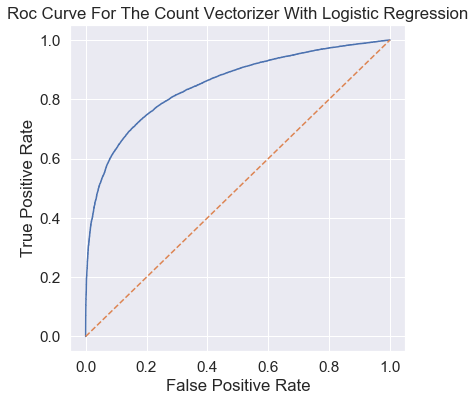

In [587]:
from sklearn.metrics import roc_curve
y_numerical = y_test
fpr, tpr, _ = roc_curve(y_numerical, probs_nut)
plt.figure(figsize = (6,6))
plt.plot(fpr, tpr);
plt.plot([0,max(y_numerical)],[0, max(y_numerical)], '--'); # it takes only encoded numerical y
plt.title('ROC curve for the Count Vectorizer with logistic regression'.title());
plt.xlabel('false positive rate'.title());
plt.ylabel('true positive rate'.title());

# Multinomial Naive 


In [87]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
clf = MultinomialNB()
clf.fit(X_train_df, y_train)
MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
preds = clf.predict(X_test_df)

print("Accuracy:",metrics.accuracy_score(y_test, preds))

Accuracy: 0.7418252968097101


In [ ]:
# Using Server
X_train_df = scipy.sparse.load_npz('/home/hzhan828/kiva/X_train_df.npz')
X_test_df = scipy.sparse.load_npz('/home/hzhan828/kiva/X_test_df.npz')
y_train = np.load('/home/hzhan828/kiva/y_train.npy')
y_test = np.load('/home/hzhan828/kiva/y_test.npy')



# SVC
## Takes time. Failed

In [ ]:

svc=SVC(probability=True, kernel='linear')
svc.fit(X_train_df, y_train)
preds = svc.predict(X_test_df)
print("Accuracy:",metrics.accuracy_score(y_test, preds))

## Try LR for Word2vec mean. Very bad result.

In [528]:
X_train_w2v = mean_desc[X_train.index]
X_test_w2v = mean_desc[X_test.index]

In [538]:
import warnings
warnings.filterwarnings("ignore")
td_log_params = {
    'penalty' : ['l1', 'l2'],
    'C' : [.1, 5, 50]
}
w2v_log_gs = GridSearchCV(estimator=LogisticRegression(), param_grid=td_log_params, cv = 5, verbose=0,scoring='f1')
w2v_gs.fit(X_train_w2v, y_train)
print('best score of Word2vec_mean with Logistic Regression is:', w2v_log_gs.best_score_.round(4))

best score of Word2vec_mean with Logistic Regression is: 0.6656


## Try to reduce the dimension of Term-Document and draw learning curve affect on dimensional reduction by choosing
## Not applicable because server failed to process it due to high dimension


In [ ]:

from sklearn.manifold import Isomap
model = Isomap(n_components=2)
proj = model.fit_transform(X_train_df)

In [ ]:

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(n_components = 2)
X_skernpca = lda.fit_transform(X_train_df.toarray(), y_train)
# Screen 128843

In [19]:
down = pd.read_csv('/Users/zhanhaochen/Desktop/STA141C/project/down.csv')

In [23]:
down = down.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis=1)


In [39]:
list(down)

['index',
 'loan_amount',
 'original_language',
 'description',
 'description_translated',
 'activity_name',
 'sector_name',
 'country_name',
 'town_name',
 'status',
 'id',
 'posted_time']

In [40]:
index = list(down['index'])

In [55]:
down = down.drop('description_translated',axis = 1)

In [67]:
down.head()

,index,loan_amount,original_language,description,activity_name,sector_name,country_name,town_name,status,id,posted_time,description_length,currency_policy,num_lenders_total
0,27,4475.0,Russian,Vitaliy lives in the city of Melitopol. He is ...,Personal Housing Expenses,Housing,Ukraine,Melitopol,expired,1470603,2018-02-16 13:57:59.000 +0000,420,shared,73
1,44,1200.0,English,"Youn, 34, lives with family members in a rural...",Farming,Agriculture,Cambodia,"Ratanakiri province, Borkeo district",expired,1514939,2018-04-23 09:20:53.000 +0000,708,shared,10
2,77,1150.0,English,"Living in a rural area of Battambang province,...",Farming,Agriculture,Cambodia,"Battambang province, Ratanak Mondul district",expired,1513542,2018-04-20 10:11:29.000 +0000,608,shared,10
3,113,1200.0,English,"Lilia, 57, lives in Danao, Plaridel, Misamis O...",Fish Selling,Food,Philippines,Plaridel-Danao,expired,446946,2012-07-05 06:12:24.000 +0000,298,shared,25
4,121,300.0,English,Melane is 32 years old and married with three ...,General Store,Retail,Philippines,"Banga, Aklan",expired,1644432,2018-11-12 06:12:43.000 +0000,321,shared,5


# Try to Convert text by BERT but unsuccessful

In [80]:
#!pip install bert-text
from bert_text import run_on_dfs

ModuleNotFoundError: No module named 'bert_text'

In [81]:
!pip install bert-text

  Using cached https://files.pythonhosted.org/packages/0b/1d/3c7226547cd6a2ba54586dfd80a49f64a0936f9bcb945a4686e843a1956a/bert_text-5.0.0-py3-none-any.whl
  Could not find a version that satisfies the requirement tensorflow-gpu (from bert-text) (from versions: )
No matching distribution found for tensorflow-gpu (from bert-text)


# Try to train Doc2vec on our own data, but too small
## https://medium.com/@mishra.thedeepak/doc2vec-simple-implementation-example-df2afbbfbad5

In [422]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

In [105]:
all_doc.head()

0    Vitaliy lives in the city of Melitopol. He is ...
1    Youn, 34, lives with family members in a rural...
2    Living in a rural area of Battambang province,...
3    Lilia, 57, lives in Danao, Plaridel, Misamis O...
4    Melane is 32 years old and married with three ...
Name: description, dtype: object

In [115]:
from nltk.stem.snowball import EnglishStemmer
stemmer = EnglishStemmer()

In [118]:
stopword = corpus.stopwords.words('english')
stemmer = EnglishStemmer()

token_doc = [i.lower() for i in all_doc]
token_doc = [nltk.word_tokenize(i) for i in token_doc]
for j in range(len(token_doc)):
    token_doc[j] = [stemmer.stem(i) for i in token_doc[j] if i not in stopword and i.isalnum()]

In [153]:
len(test_label)

150767

In [157]:
#np.save('test_label',test_label)

In [191]:
max_epochs = 10
vec_size = 100
alpha = 0.00225

model = Doc2Vec(vector_size=vec_size,
                alpha=alpha, 
                min_alpha=0.00025,
                min_count=1,
                dm =1,
                workers=14)
  
model.build_vocab(documents)

for epoch in range(max_epochs):
    print('iteration {0}'.format(epoch))
    model.train(documents,
                total_examples=model.corpus_count,
                epochs=model.iter)
    # decrease the learning rate
    model.alpha -= 0.0002
    # fix the learning rate, no decay
    model.min_alpha = model.alpha



iteration 0


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: DeprecationWarning: Call to deprecated `iter` (Attribute will be removed in 4.0.0, use self.epochs instead).


iteration 1
iteration 2
iteration 3
iteration 4
iteration 5
iteration 6
iteration 7
iteration 8
iteration 9


In [193]:
#model.save('d2vmodel')
model = Doc2Vec.load('/Users/zhanhaochen/Desktop/STA160/d2vmodel')

In [194]:
model.docvecs[1000]

array([-0.02687809, -0.04255687,  0.1020999 ,  0.05017639, -0.05757587,
        0.05136483,  0.06118405,  0.00219979, -0.04495549,  0.05542134,
        0.0350145 ,  0.01642582, -0.02462445,  0.11582501, -0.04823469,
        0.06596886,  0.03804991,  0.00488912,  0.0158067 , -0.12141874,
       -0.01187874,  0.06911854, -0.0697382 , -0.03585733, -0.06140516,
       -0.10846081, -0.03644643,  0.06090361,  0.01537271,  0.0193686 ,
       -0.03222429,  0.07242803,  0.00653353,  0.11036338,  0.01331097,
       -0.05595232,  0.11855619,  0.09598365, -0.00399055, -0.04579922,
       -0.09090235,  0.00814781, -0.04166023,  0.11240762,  0.06158145,
       -0.10134752,  0.08465026, -0.08499537, -0.05493293, -0.06464352,
       -0.0942123 , -0.03519459, -0.06012494,  0.05985796, -0.01936176,
        0.01205132, -0.05775598, -0.05706562,  0.05456845, -0.05302735,
        0.0923391 , -0.04804731,  0.04967562,  0.05289003,  0.07959003,
        0.00882501,  0.01899541,  0.01110418, -0.05259578,  0.10

In [433]:
import pickle
with open("token_doc.txt", "wb") as fp:
    pickle.dump(token_doc, fp)







In [ ]:
with open("token_doc.txt", "rb") as fp:
    token_doc = pickle.load(fp)

In [ ]:
with open("/home/hzhan828/kiva/token_doc.txt", "rb") as fp:
    token_doc = pickle.load(fp)

# Pretrained Wiki Doc2vec on server

In [ ]:
model="/home/hzhan828/kiva/enwiki_dbow/doc2vec.bin"

In [427]:
model="/Users/zhanhaochen/Desktop/STA160/pretrained_d2v/enwiki_dbow/doc2vec.bin"
start_alpha=0.01
infer_epoch=100
m = Doc2Vec.load(model)


In [431]:
X=[]
for d in token_doc:
    X.append(m.infer_vector(d, alpha=start_alpha, steps=infer_epoch))

KeyboardInterrupt: 

In [ ]:
#Final out gives each description a 300 dimensional vector.

## 2D projection of sampled descriptions in Document-Term representation
## kernel PCA, Isomap, MDS, T-SNE

In [333]:
def Isomap(freq, title, y,n=5):
    from sklearn.manifold import Isomap


    model = Isomap(n_components=2, n_neighbors=n)
    proj = model.fit_transform(freq)

    plt.figure(figsize=(8,6))
    plt.scatter(proj[y==1, 0], proj[y==1, 1], color='red', alpha=0.5, label = 'funded')
    plt.scatter(proj[y==0, 0], proj[y==0, 1], color='blue', alpha=0.5, label = 'expired')
    plt.title(title)
    plt.legend()
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.show()

In [155]:
#Multidimensional
def MDS(freq, title, y):
    from sklearn.metrics import pairwise_distances
    D = pairwise_distances(freq)


    from sklearn.manifold import MDS
    model = MDS(n_components=2, dissimilarity='precomputed', random_state=1)
    out = model.fit_transform(D) ## THis is where you are passing the computed dissimilarity from last step to the MDS command.
    plt.figure(figsize=(8,6))
    plt.scatter(out[y==1, 0], out[y==1, 1], color='red', alpha=0.5, label = 'funded')
    plt.scatter(out[y==0, 0], out[y==0, 1], color='blue', alpha=0.5, label = 'expired')
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.title(title)
    plt.legend()
    plt.show()


In [355]:
from sklearn.metrics import pairwise_distances
def TSNE(freq, title, y):
    from sklearn.manifold import TSNE
    tsne = TSNE(n_components=2, random_state=0)
    X_2d = tsne.fit_transform(freq.toarray())
    plt.figure(figsize=(8,6))
    plt.scatter(X_2d[y==1, 0], X_2d[y==1, 1], color='red', alpha=0.5, label = 'funded')
    plt.scatter(X_2d[y==0, 0], X_2d[y==0, 1], color='blue', alpha=0.5, label = 'expired')
    plt.legend()
    plt.title(title)

    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.show()

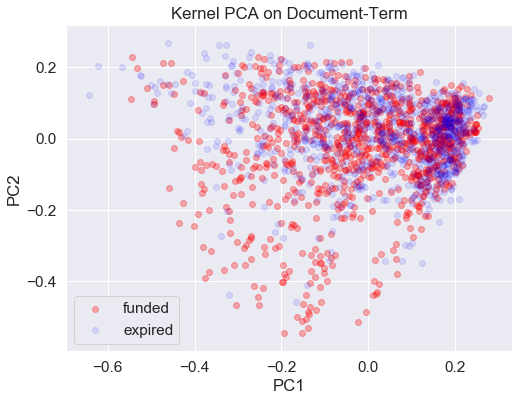

In [423]:
kernel_PCA(freq,'Kernel PCA on Document-Term',test_y,kernel = 'cosine')

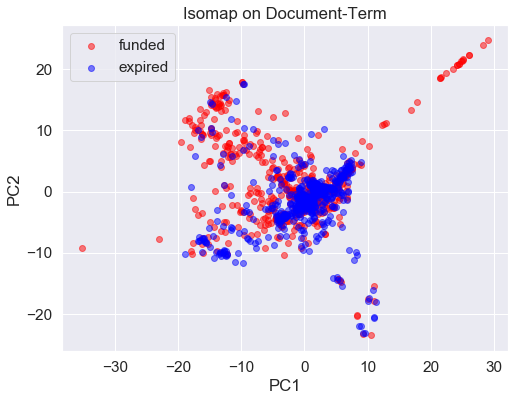

In [347]:
Isomap(freq, 'Isomap on Document-Term', test_y,n=8)

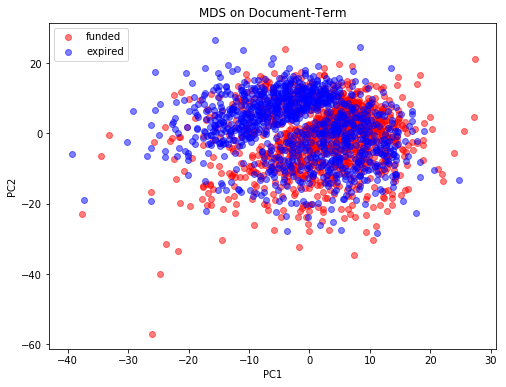

In [175]:
MDS(freq, 'MDS on Document-Term',test_y)

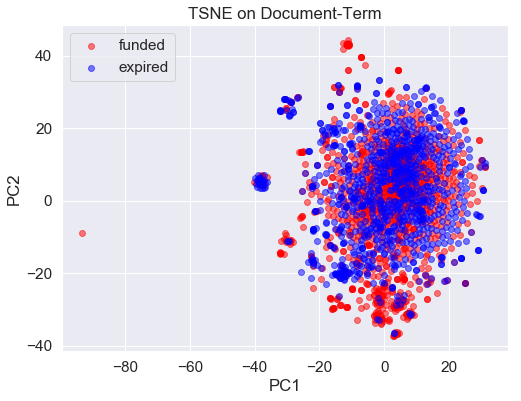

In [356]:
TSNE(freq, 'TSNE on Document-Term',test_y)

# tf-idf

In [357]:
tfidf = TfidfVectorizer(stop_words = stopword)
tfidf_freq = tfidf.fit_transform(test_x)
tfidf_freq.shape

(2000, 10919)

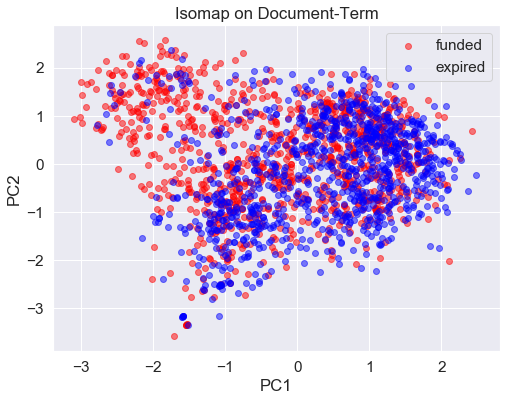

In [373]:
Isomap(tfidf_freq, 'Isomap on Document-Term', test_y, 8)

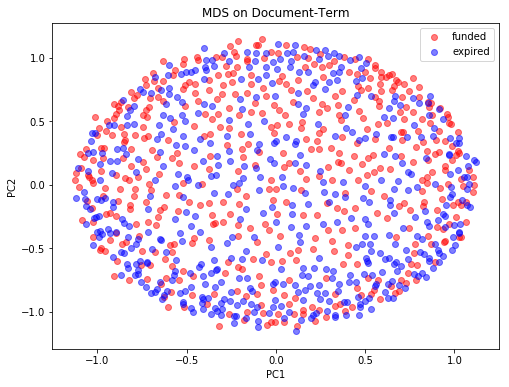

In [156]:
MDS(tfidf_freq, 'MDS on Document-Term',test_y)

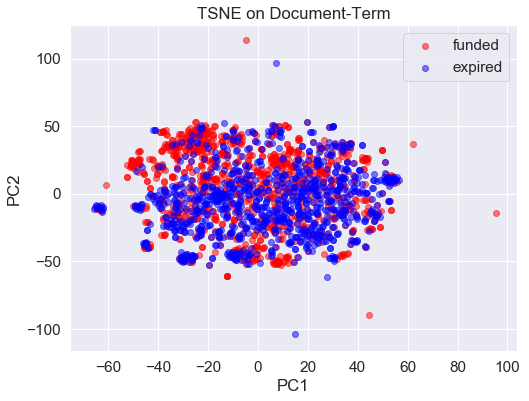

In [359]:
TSNE(tfidf_freq, 'TSNE on Document-Term',test_y)

# Apply PCA on word2vec and project it on 2D

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


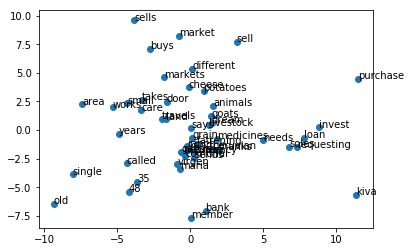

In [386]:
X = model[model.wv.vocab][:50]
pca = PCA(n_components=2)
result = pca.fit_transform(X)
# create a scatter plot of the projection
pyplot.scatter(result[:, 0], result[:, 1])
words = list(model.wv.vocab)[:50]
for i, word in enumerate(words):
	pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()